## Visualizing github stargazers over time for a repository

In [5]:
# github api helper function

import requests
import time
from requests.auth import HTTPBasicAuth

url = "https://api.github.com/rate_limit"
def make_api_call(url):
    auth = ('ThePrecious', 'XXX')
    headers = {"Accept": "application/vnd.github.v3.star+json"}
    response = requests.get(url, auth=auth, headers=headers)
    return response

In [6]:
## get star details for a sample repo
url = "https://api.github.com/repos/dmlc/mxnet/stargazers"
response = make_api_call(url)
print response.json()

[{u'starred_at': u'2015-06-23T02:44:08Z', u'user': {u'following_url': u'https://api.github.com/users/shuokay/following{/other_user}', u'events_url': u'https://api.github.com/users/shuokay/events{/privacy}', u'organizations_url': u'https://api.github.com/users/shuokay/orgs', u'url': u'https://api.github.com/users/shuokay', u'gists_url': u'https://api.github.com/users/shuokay/gists{/gist_id}', u'html_url': u'https://github.com/shuokay', u'subscriptions_url': u'https://api.github.com/users/shuokay/subscriptions', u'avatar_url': u'https://avatars0.githubusercontent.com/u/5029591?v=3', u'repos_url': u'https://api.github.com/users/shuokay/repos', u'received_events_url': u'https://api.github.com/users/shuokay/received_events', u'gravatar_id': u'', u'starred_url': u'https://api.github.com/users/shuokay/starred{/owner}{/repo}', u'site_admin': False, u'login': u'shuokay', u'type': u'User', u'id': 5029591, u'followers_url': u'https://api.github.com/users/shuokay/followers'}}, {u'starred_at': u'20

### Lets take a look at the Github response headers

In [7]:
response.headers

{'X-XSS-Protection': '1; mode=block', 'Content-Security-Policy': "default-src 'none'", 'Access-Control-Expose-Headers': 'ETag, Link, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval', 'Transfer-Encoding': 'chunked', 'Access-Control-Allow-Origin': '*', 'X-Frame-Options': 'deny', 'Status': '200 OK', 'X-Served-By': '77fbfb53269bbb85f82f23584d59f7c1', 'X-GitHub-Request-Id': 'F34D:7792:30F6151:3A00802:595AB0A6', 'ETag': 'W/"00421a2e60932782e88c059c47025bc8"', 'Link': '<https://api.github.com/repositories/34864402/stargazers?page=2>; rel="next", <https://api.github.com/repositories/34864402/stargazers?page=342>; rel="last"', 'Date': 'Mon, 03 Jul 2017 21:01:26 GMT', 'X-RateLimit-Remaining': '4998', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'Server': 'GitHub.com', 'X-GitHub-Media-Type': 'github.v3; param=star; format=json', 'X-Content-Type-Options': 'nosniff', 'Content-Encoding

### Lets extract the total number of pages and the base url to call

In [8]:
total_pages = int(response.headers['Link'].split(',')[1].split('page=')[1].split('>;')[0])
print total_pages

342


In [9]:
base_url = response.headers['Link'].split(',')[1].split('?')[0][2:]
print base_url

https://api.github.com/repositories/34864402/stargazers


## Get all the stargazers page by page and store them in a dictionary

In [10]:
# Get all the users who have starred the repo

star_details = {}
total_pages = 5 # Temp; comment this line for all pages

for i in range(1, total_pages):
    url = base_url + "?page=%s" %i
    response = make_api_call(url);
    result = response.json()

    for obj in result:
        s_date = obj['starred_at']
        user_id = obj['user']['id']
        login = obj['user']['login']
        star_details[user_id] = [login, s_date] 
 
    ## get fields related to rate limit from header
    rate_limit_remain = int(response.headers['X-RateLimit-Remaining'])
    rate_limit_reset = int(response.headers['X-RateLimit-Reset'])

    ## if <=100 sleep for 100 seconds
    if rate_limit_remain <= 100:
        diff = rate_limit_reset - int(time.time())
        if diff < 0: 
            diff = 100
        time.sleep(diff)
    
print len(star_details)
print star_details

120
{15874: [u'holsety', u'2015-09-25T01:51:45Z'], 1942359: [u'rossant', u'2015-09-28T21:22:18Z'], 6261776: [u'TangXing', u'2015-09-16T03:03:59Z'], 35346: [u'xuanhan863', u'2015-09-28T02:51:18Z'], 1438742: [u'richardhahahaha', u'2015-09-29T06:16:43Z'], 982873: [u'FeiSun', u'2015-09-29T06:59:57Z'], 4512793: [u'walterreade', u'2015-09-28T16:25:06Z'], 2803738: [u'shibochan', u'2015-09-27T03:20:04Z'], 246302: [u'josephmisiti', u'2015-09-21T15:18:40Z'], 327203: [u'rougier', u'2015-09-29T04:27:08Z'], 2245162: [u'pillowsoft', u'2015-09-22T00:31:45Z'], 860719: [u'juanchoc', u'2015-09-22T06:32:20Z'], 1811508: [u'IsaacZhi', u'2015-09-29T05:53:35Z'], 2041398: [u'jiangplus', u'2015-09-28T02:34:35Z'], 921146: [u'w1kke', u'2015-09-24T04:03:20Z'], 6666812: [u'vchollati', u'2015-09-22T02:40:55Z'], 4003908: [u'mrgloom', u'2015-07-16T09:21:09Z'], 581189: [u'ceys', u'2015-09-07T13:04:08Z'], 4028684: [u'xingdi-eric-yuan', u'2015-09-29T06:05:24Z'], 1197132: [u'berleon', u'2015-08-14T19:31:46Z'], 1714767: [

## parse and bin the count according to date

In [11]:
#len(star_details)
star_counts = {}

for k,v in star_details.iteritems():
    d = v[1]
    d = d.split('T')[0]
    if star_counts.has_key(d):
        star_counts[d] += 1
    else:
        star_counts[d] = 1
        
star_counts

{u'2015-06-23': 2,
 u'2015-06-25': 1,
 u'2015-06-26': 1,
 u'2015-06-28': 1,
 u'2015-07-10': 1,
 u'2015-07-15': 1,
 u'2015-07-16': 1,
 u'2015-07-30': 1,
 u'2015-08-06': 1,
 u'2015-08-13': 1,
 u'2015-08-14': 1,
 u'2015-08-16': 1,
 u'2015-08-17': 1,
 u'2015-08-18': 2,
 u'2015-08-25': 1,
 u'2015-08-26': 1,
 u'2015-08-28': 1,
 u'2015-09-02': 2,
 u'2015-09-06': 1,
 u'2015-09-07': 1,
 u'2015-09-13': 1,
 u'2015-09-14': 2,
 u'2015-09-16': 1,
 u'2015-09-21': 16,
 u'2015-09-22': 15,
 u'2015-09-23': 3,
 u'2015-09-24': 2,
 u'2015-09-25': 15,
 u'2015-09-26': 2,
 u'2015-09-27': 8,
 u'2015-09-28': 14,
 u'2015-09-29': 18}

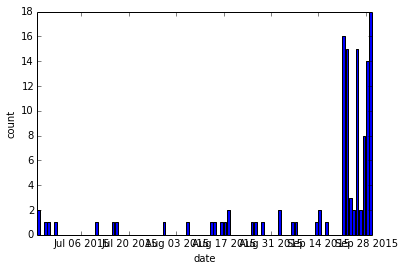

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

#import mpld3
#mpld3.enable_notebook()

# x-axis: date
# y-axis: count

ax = plt.subplot(111)

plt.xlabel('date')
plt.ylabel('count')

x = [datetime.strptime(k, '%Y-%m-%d') for k in star_counts.keys()]
y = star_counts.values()
ax.bar(x, y)

plt.show()

In [ ]:
# get user info
#url = "https://api.github.com/users/sunilmallya"
#response = make_api_call(url)
#print response.json()